# Produce a surf report

The `SurfReport` object features additional reporting functionalities, such as plotting methods and easily readable surf reports.

In [1]:
from pysurfline import SurfReport

List of known spot id

| Spot Id | Name |
|---|---|
| 5842041f4e65fad6a7708890 | Pipeline (USA)|
| 584204204e65fad6a7709b09 | Varazze (ITA)|
| 5842041f4e65fad6a7708b4b | Uluwatu (IDN)
| 5842041f4e65fad6a7708c8e | La Graviere (FRA)|

Initializing a `SurfReport` objects does nothing else than calling a `SpotForecast` object with the specified `params` for requesting the desired response data by the Surfline API. 

In [2]:
params = {
    "spotId": "5842041f4e65fad6a7708890",
    "days": 3,
    "intervalHours": 3,
}
report = SurfReport(params)
report.api_log


['ForecastGetter(Type:wave, Status:200)',
 'ForecastGetter(Type:wind, Status:200)',
 'ForecastGetter(Type:tides, Status:200)',
 'ForecastGetter(Type:weather, Status:200)']

With respect to the `SpotForecast` objects, that stores separately all the raw response data as class attributes, the `SurfReport` object has the additional `df` attribute to easily inspect all the hourly data fetched from the Surfline servers merged into a readable `pandas.DataFrame` object.

In [3]:
report.df.head()

,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,surf_raw_max,swells,utcOffset,speed,direction,directionType,gust,optimalScore,utcOffset,temperature,condition
timestamp,,,,,,,,,,,,,,,,,,
2022-12-30 10:00:00,-10,3.0,4.5,2,False,2-3x overhead,2.9332,4.3348,"[{'height': 2.13539, 'period': 14, 'direction'...",-10,7.14811,110.98103,Offshore,8.28467,2,-10,23.60580,NIGHT_CLEAR
2022-12-30 13:00:00,-10,3.0,4.5,2,False,2-3x overhead,3.0706,4.5434,"[{'height': 2.19978, 'period': 14, 'direction'...",-10,9.44096,56.91445,Cross-shore,12.24000,0,-10,23.48029,NIGHT_CLEAR
2022-12-30 16:00:00,-10,3.0,4.5,2,False,2-3x overhead,3.0480,4.5720,"[{'height': 2.22352, 'period': 14, 'direction'...",-10,13.65204,37.81846,Cross-shore,17.65384,0,-10,23.48877,NIGHT_CLEAR
2022-12-30 19:00:00,-10,3.0,4.5,2,False,2-3x overhead,2.7332,4.1348,"[{'height': 2.19437, 'period': 14, 'direction'...",-10,19.34267,60.61127,Cross-shore,24.50858,0,-10,24.40082,CLEAR
2022-12-30 22:00:00,-10,2.4,3.7,2,False,2x overhead,2.4384,3.6576,"[{'height': 2.11455, 'period': 14, 'direction'...",-10,24.57754,78.93308,Offshore,25.97832,0,-10,24.58682,CLEAR


Moreover, a simplified version of the dataframe is available with the `surf` attribute. This represents the surf data that is actually plotted.

In [4]:
report.surf.head()

,surf_min,surf_max,speed,directionType,direction
timestamp,,,,,
2022-12-30 10:00:00,3.0,4.5,7.14811,Offshore,110.98103
2022-12-30 13:00:00,3.0,4.5,9.44096,Cross-shore,56.91445
2022-12-30 16:00:00,3.0,4.5,13.65204,Cross-shore,37.81846
2022-12-30 19:00:00,3.0,4.5,19.34267,Cross-shore,60.61127
2022-12-30 22:00:00,2.4,3.7,24.57754,Offshore,78.93308


Lets then call the `plot()` method, that returns a `matplotlib` figure representing the minimum and maximum **surf size** that is forecasted for the spot.

**Daylight hours** are shown in the plot, with darkgrey representing night and lightgrey representing dusk and dawn.

**Wind speed and direction** is annotated at the top.

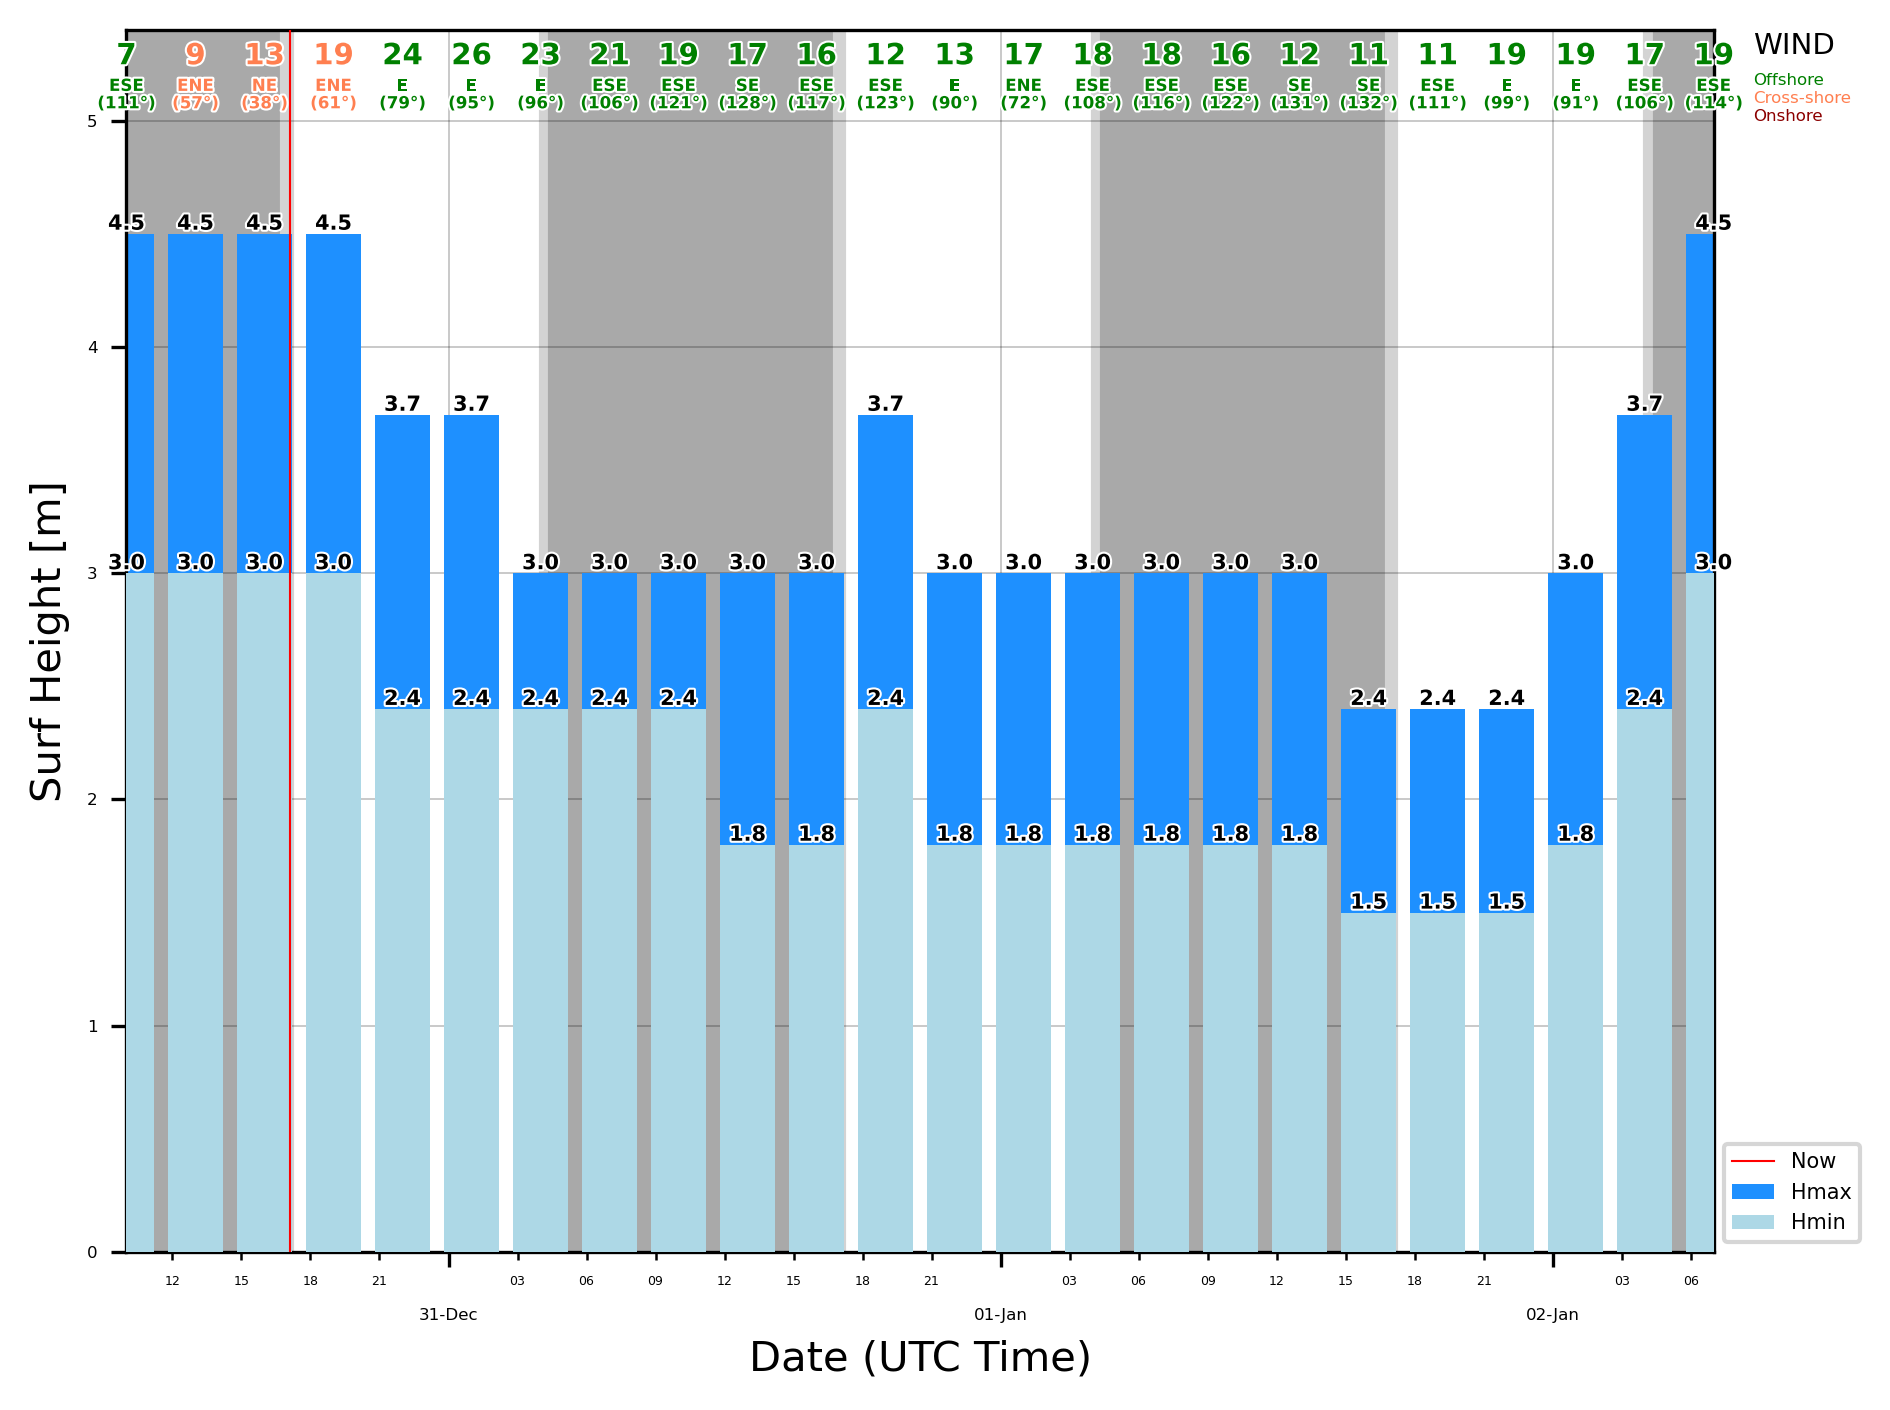

In [5]:
f=report.plot()
f.savefig("../images/surfreport_pipeline.jpeg")